YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


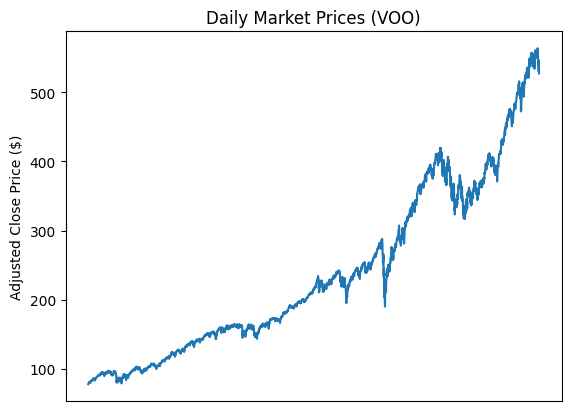

In [1]:
from lbm.datasets.voo import ClosePricesPreprocessor
from matplotlib import pyplot as plt

processor1 = ClosePricesPreprocessor(lookback=1)
train_loader, val_loader, test_loader = processor1.get_loaders()

prices = processor1.dataset.x
plt.plot(prices)
plt.title("Daily Market Prices (VOO)")
# turn off labels on x-axis
plt.ylabel("Adjusted Close Price ($)")
plt.xticks([])
plt.show()

In [2]:
from torch.optim import Adam
from torch.nn import MSELoss
from lbm.devices import get_device
from lbm.workflow.visualized import train_and_validate, ReturnDeltas, DirectionalAccuracy
import numpy as np
import torch
import warnings
from torch import nn

warnings.simplefilter('error')

device = get_device()

def validate_model(model, preprocessor, epochs=50, optimizer=None, 
                   loss_fn=MSELoss()):
    if optimizer is None:
        optimizer = Adam(model.parameters())
    train_loader, val_loader, _ = preprocessor.get_loaders()
    accuracy = DirectionalAccuracy()
    deltas = ReturnDeltas()
    metrics = [accuracy, deltas]
    train_and_validate(model, train_loader, val_loader, optimizer, loss_fn,
                       epochs=epochs, device=device, metrics=metrics)


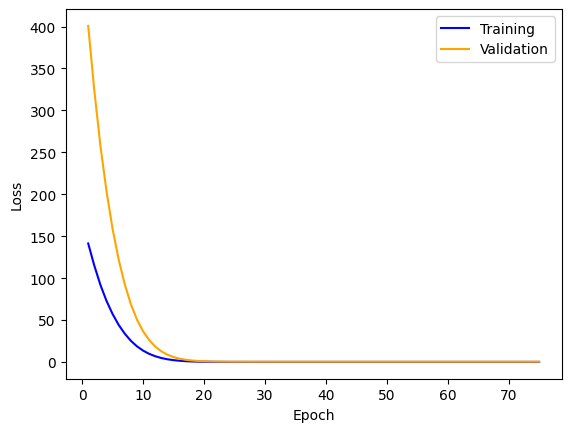

Directional Accuracy: 50.5%


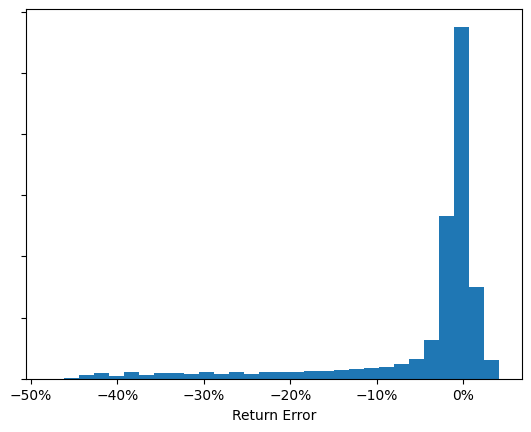

In [3]:
class LinearOneItemForecaster(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        x = x.squeeze(2)
        x = self.linear(x)
        x = x
        return x

model = LinearOneItemForecaster()

validate_model(model, processor1, epochs=75)

In [5]:
from lbm.loss import MASELoss

model = LinearOneItemForecaster()
loss = MASELoss()

validate_model(model, processor1, epochs=75, loss_fn=loss)

TypeError: MASELoss.forward() missing 1 required positional argument: 'x'